In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

In [85]:
maximum=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
minimum=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month=list(range(0,12))


Text(0, 0.5, 'Temperature')

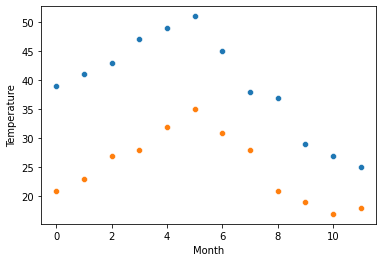

In [86]:
sns.scatterplot(x=month,y=maximum)
sns.scatterplot(x=month,y=minimum)
plt.xlabel('Month')
plt.ylabel('Temperature')

In [132]:
def objective(x,a,b,c):
    return a*np.sin(b*x*(np.pi/180))+c

In [133]:
opt_max,_=curve_fit(objective,month,maximum)
opt_min,_=curve_fit(objective,month,minimum)

In [134]:
a,b,c=opt_max
x,y,z=opt_min

In [135]:
y_new_max=[]
y_new_min=[]
for i in month:
    y_new_max.append(objective(i,a,b,c))
    y_new_min.append(objective(i,x,y,z))

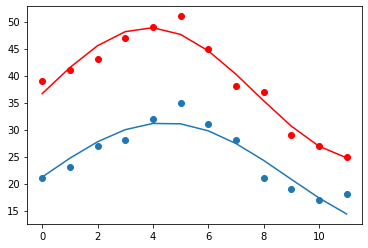

In [136]:
plt.plot(y_new_max,c='r')
plt.scatter(y=maximum,x=month,c='r')
plt.plot(y_new_min)
plt.scatter(y=minimum,x=month)

### Matplotlib

In [143]:
titanic=sns.load_dataset('titanic')

In [179]:
titanic['sex_enc']=np.where(titanic.sex=='male',1,0)

In [181]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_enc
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [155]:
male=titanic.sex.value_counts()[0]
female=titanic.sex.value_counts()[1]

[]

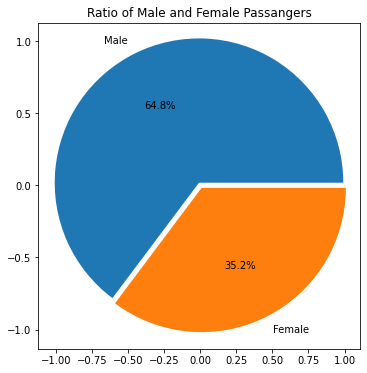

In [173]:
plt.figure(figsize=(6,6))
plt.pie(x=[male,female],explode=[0.02,0.02],labels=['Male','Female'],autopct="%.1f%%",frame=True)
plt.title('Ratio of Male and Female Passangers')
plt.plot()

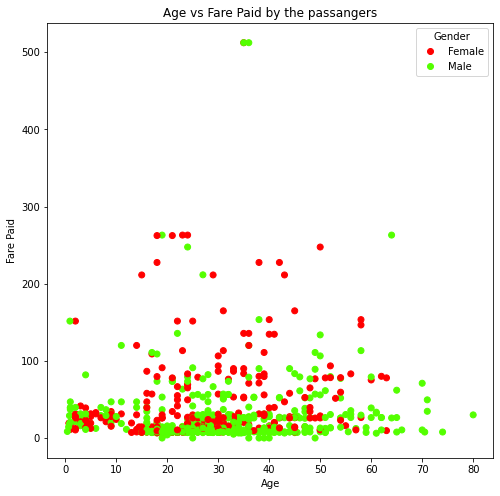

In [232]:
plt.figure(figsize=(8,8))
scatter=plt.scatter(x='age',y='fare',data=titanic,c='sex_enc',cmap='prism')
plt.title('Age vs Fare Paid by the passangers')
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.legend(handles=scatter.legend_elements()[0],title='Gender',labels=['Female','Male'])
plt.show()